# Modelo de Ising bidimensional

Implementación del modelo de Ising usando Metropolis

In [108]:
import random, math
import matplotlib.pyplot as plt
import numpy as np

def energy(S, N, nbr):
        E = 0.0
        for k in range(N):

            # La energía corresponde a la interacción del espín con cada uno de sus vecinos próximos
            E = S[k] * sum(S[nn] for nn in nbr[k])
        return 0.5 * E

def Total_energy(S, L, T):
    # Función que calcula la energía total del sistema

    N = L*L
    # Da los vecinos próximos de cada espín i
    nbr = {i: ((i//L) * L + (i + 1) % L, (i + L) % N,
               (i//L) * L + (i - 1) % L, (i - L) % N) \
                                      for i in range(N)}

    # Temperatura
    beta = 1.0 / T
    # S = [1 for k in range(N)]
    
    S_ini = np.copy(S)
    S_mat_ini = np.reshape(S, (L,L))

    # Número de pasos
    nsteps = N * 100
    Energy = energy(S, N, nbr)

    E = []

    for step in range(nsteps):
        k = np.random.randint(0, N-1)
        delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
        if np.random.uniform(0.0, 1.0) < np.exp(-beta * delta_E):
            S[k] *= -1
            Energy += delta_E
        E.append(Energy)

    S_mat_end = np.reshape(S, (L,L))
    S_end = np.copy(S)

    EM = np.sum(E)/float(len(E) * N)
    M = np.sum(S_end)/N
    
    #print("Energía media por espín: ", np.sum(E)/float(len(E) * N))
    return EM, M

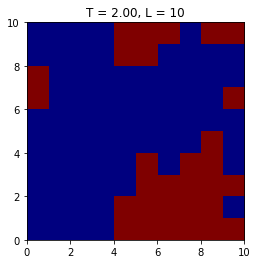

In [35]:
def x_y(k, L):
    y = k // L
    x = k - y * L
    return x,y

conf = [[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x, y = x_y(k, L)
    conf[x][y] = S[k]
    
plt.imshow(conf, extent = [0, L, 0, L], interpolation = 'nearest')
plt.set_cmap('jet')
plt.title(f'T = {T:.2f}, L = {L:d}')
plt.show()

In [92]:
def graph(Si, Sf, T, L):
    conf1 = [[0 for x in range(L)] for y in range(L)]
    conf2 = [[0 for x in range(L)] for y in range(L)]
    for k in range(N):
        x, y = x_y(k, L)
        conf1[x][y] = Si[k]
        conf2[x][y] = Sf[k]
        
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(conf1, extent = [0, L, 0, L], interpolation = 'nearest')
    axs[0].set_title(f'Inicial T = {T:.2f}, L = {L:d}')
    
    axs[1].imshow(conf2, extent = [0, L, 0, L], interpolation = 'nearest')
    plt.set_cmap('jet')
    axs[1].set_title(f'Final T = {T:.2f}, L = {L:d}')
    plt.show()

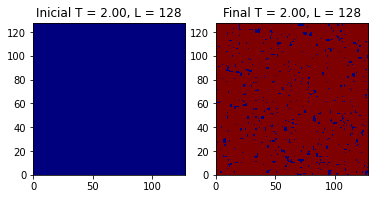

In [77]:
graph(S_ini, S_end, T, L)

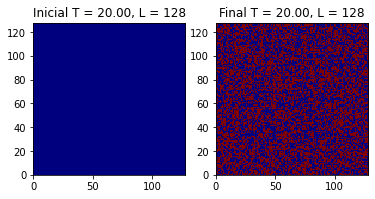

In [79]:
graph(S_ini, S_end, T, L)

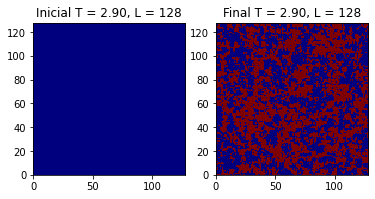

In [81]:
graph(S_ini, S_end, T, L)

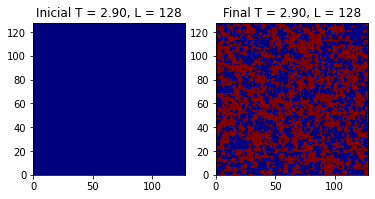

In [83]:
graph(S_ini, S_end, T, L)

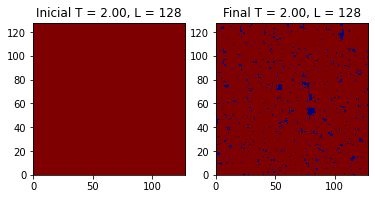

In [93]:
graph(S_ini, S_end, T, L)

In [ ]:
# Gráfica de la energía media en función de la temperatura
from tqdm import tqdm

T = np.linspace(0.5, 4, 50)
L = 32
S = [1 for i in range(L*L)]


EE = []
MM =[]

for i in tqdm(T):
    Energia, Magn = Total_energy(S, L, i)
    EE.append(Energia)
    MM.append(Magn)

plt.figure(figsize=(16,9))
plt.plot(T, EE)
plt.figure(figsize=(16,9))
plt.plot(T, MM)

 66%|████████████████████████████▍              | 33/50 [00:28<00:14,  1.15it/s]

La magnetización viene dada por:

\begin{equation}
M = \frac{1}{N} \sum \sigma_i
\end{equation}

La susceptibilidad:

\begin{equation}
M = \frac{1}{N} \sum \sigma_i
\end{equation}


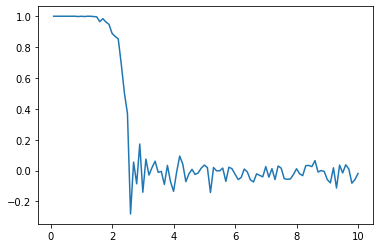

In [104]:
plt.plot(T, MM)